<a href="https://colab.research.google.com/github/kailashDataScience/PROJECTS/blob/main/IPL_analys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#------------------------- IPL ANALYSIS ----------------------------

IPL (Indian Premier League) is a professional Twenty20 cricket league played in India. It is one of the most popular and highly anticipated cricket tournaments in the world. The league features teams representing different cities and states in India, with both Indian and international players showcasing their skills.
**bold text**
Analyzing IPL data provides valuable insights into team performances, player statistics, match outcomes, and trends over the years. It involves exploring various aspects of the game, including batting, bowling, fielding, team strategies, and match results.

By analyzing IPL data, we can uncover interesting patterns, identify key players, evaluate team strategies, and gain a deeper understanding of the game. Some common analyses in IPL include:

1. Team performance: Examining the win-loss records, run rates, and scoring patterns of each team to identify the most successful and consistent performers.

2. Player statistics: Analyzing individual player performances, including batting averages, strike rates, wicket-taking abilities, and fielding contributions.

3. Toss analysis: Investigating the impact of winning the toss on match outcomes, as well as studying the preferred choices of teams after winning the toss.

4. Venue analysis: Assessing the performance of teams at different stadiums to identify home ground advantages and trends in winning percentages.

5. Season-wise analysis: Comparing team performances, player statistics, and trends across different IPL seasons to identify patterns and changes over time.

6. Boundary analysis: Analyzing the frequency of boundaries (fours and sixes) and their impact on team scores and match outcomes.

These analyses can provide valuable insights to fans, teams, and analysts, helping them make informed decisions and predictions about future matches and tournaments.

With access to the IPL dataset, we can perform various analyses and answer specific questions related to team performance, player statistics, match outcomes, and strategic aspects of the game.bold text

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/IMDB-Movie-Data.csv")
df.shape

(1000, 12)

In [ ]:
df.dropna(inplace =True)
df.to_csv('IMDB-data.csv')

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
average_rating = df['Rating'].mean()

top_directors = df[df['Rating'] > average_rating].groupby('Director')['Rating'].mean().nlargest(5)

print(top_directors)


Director
Nitesh Tiwari        8.80
Christopher Nolan    8.68
Makoto Shinkai       8.60
Olivier Nakache      8.60
Aamir Khan           8.50
Name: Rating, dtype: float64


In [ ]:
# load data set
df_ipl = pd.read_csv('/content/IPL Matches 2008-2020.csv')
df_ball = pd.read_csv('/content/IPL Ball-by-Ball 2008-2020.csv')

1 ) WHAT WAS THE COUNT OF MATCHES PLAYED IN EACH SEASON ?

In [ ]:
# CREATING A NEW YEAR COUNMS FRON THE EXISTING DATE COLUMN
dates = []
for dte in list(df_ipl['date']):
  dates.append(dte.split('-'))
years = [date[0] for date in dates]
df_ipl['year'] = years

In [ ]:
match_count = {'2008':0, '2009':0, '2010':0, '2011':0, '2012':0, '2013':0, '2014':0, '2015':0,
       '2016':0, '2017':0, '2018':0, '2019' :0, '2020': 0}
for y in list(df_ipl['year']):
  match_count[y] = match_count[y] + 1

for i in list(match_count.keys()):
  print('THE NUMBER OF MATCHES IN ' + i + ' : ' + str(match_count[i]))

THE NUMBER OF MATCHES IN 2008 : 58
THE NUMBER OF MATCHES IN 2009 : 57
THE NUMBER OF MATCHES IN 2010 : 60
THE NUMBER OF MATCHES IN 2011 : 73
THE NUMBER OF MATCHES IN 2012 : 74
THE NUMBER OF MATCHES IN 2013 : 76
THE NUMBER OF MATCHES IN 2014 : 60
THE NUMBER OF MATCHES IN 2015 : 59
THE NUMBER OF MATCHES IN 2016 : 60
THE NUMBER OF MATCHES IN 2017 : 59
THE NUMBER OF MATCHES IN 2018 : 60
THE NUMBER OF MATCHES IN 2019 : 60
THE NUMBER OF MATCHES IN 2020 : 60


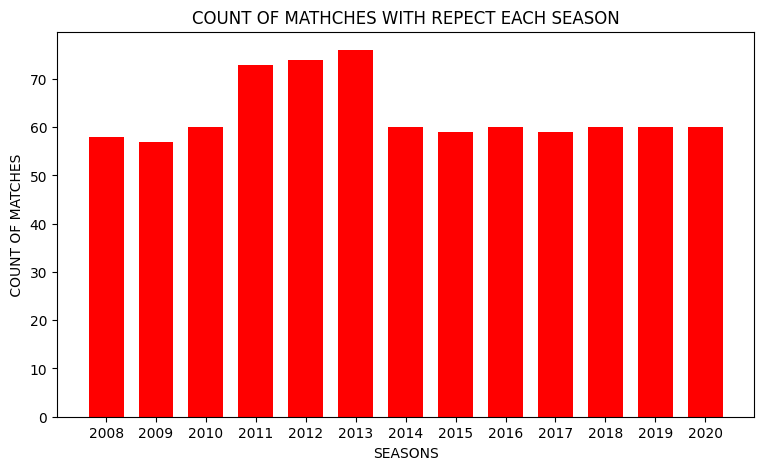

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (9,5))
plt.bar(match_count.keys(), match_count.values(), width = 0.7, color = 'r')

plt.xlabel ('SEASONS')
plt.ylabel(" COUNT OF MATCHES ")
plt.title('COUNT OF MATHCHES WITH REPECT EACH SEASON')

plt.show()

How many runs were scored in each season ?


 the total runs scored in each season 
 season
2008    17937
2009    16320
2010    18864
2011    21154
2012    22453
2013    22541
2014    18909
2015    18332
2016    18862
2017    18769
2018    19901
2019    19400
2020    19352
Name: total_runs, dtype: int64


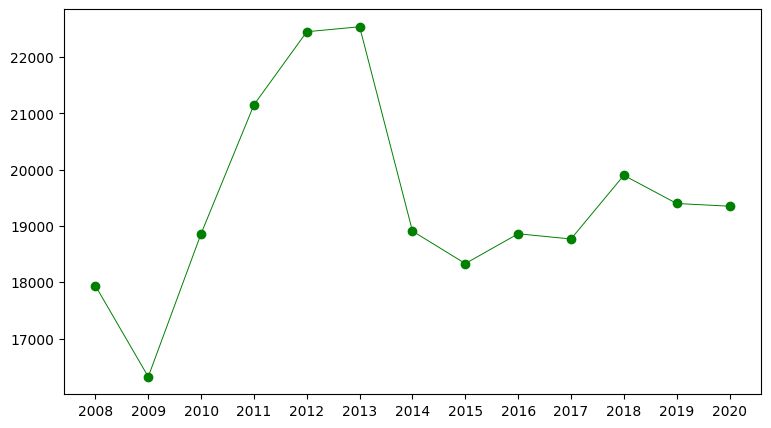

In [ ]:

# Extract the season from the 'date' column in the match data frame
df_ipl['season'] = df_ipl['date'].apply(lambda x: x.split('-')[0])
# Merge the match data frame and ball data frame on the 'id' column
merged_df = pd.merge(df_ipl, df_ball, on='id')

# Group by season and calculate the sum of 'total_runs'
season_runs = merged_df.groupby('season')['total_runs'].sum()

# Print the total runs scored in each season
print('\n the total runs scored in each season \n',season_runs)

plt.figure(figsize = (9,5))
plt.plot(season_runs, linewidth = 0.7, color = 'g', marker = 'o')

## 3 ) What were the runs scored per match in different seosons


 the runs scored per match in different seasons 
 season
2008    309.258621
2009    286.315789
2010    314.400000
2011    289.780822
2012    303.418919
2013    296.592105
2014    315.150000
2015    310.711864
2016    314.366667
2017    318.118644
2018    331.683333
2019    323.333333
2020    322.533333
Name: total_runs, dtype: float64


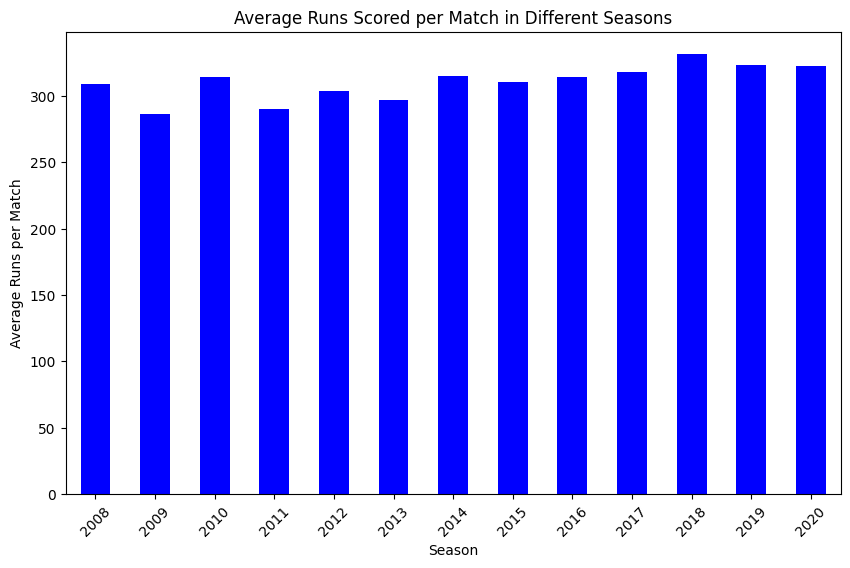

In [ ]:


# Merge the match data frame and ball data frame on the 'id' column
merged_df = pd.merge(df_ipl, df_ball, on='id')

# Calculate the total runs scored in each match
match_runs = merged_df.groupby(['id', 'season'])['total_runs'].sum().reset_index()

# Calculate the average runs scored per match in each season
average_runs_per_match = match_runs.groupby('season')['total_runs'].mean()

# Print the runs scored per match in different seasons
print('\n the runs scored per match in different seasons \n',average_runs_per_match)



# Plot the runs scored per match in different seasons
plt.figure(figsize=(10, 6))
average_runs_per_match.plot(kind='bar', color='blue')
plt.title('Average Runs Scored per Match in Different Seasons')
plt.xlabel('Season')
plt.ylabel('Average Runs per Match')
plt.xticks(rotation=45)
plt.show()


4 ) WHO HAS UMPIRED THE MOST



The umpire who has officiated the most matches is S Ravi with 121 matches.



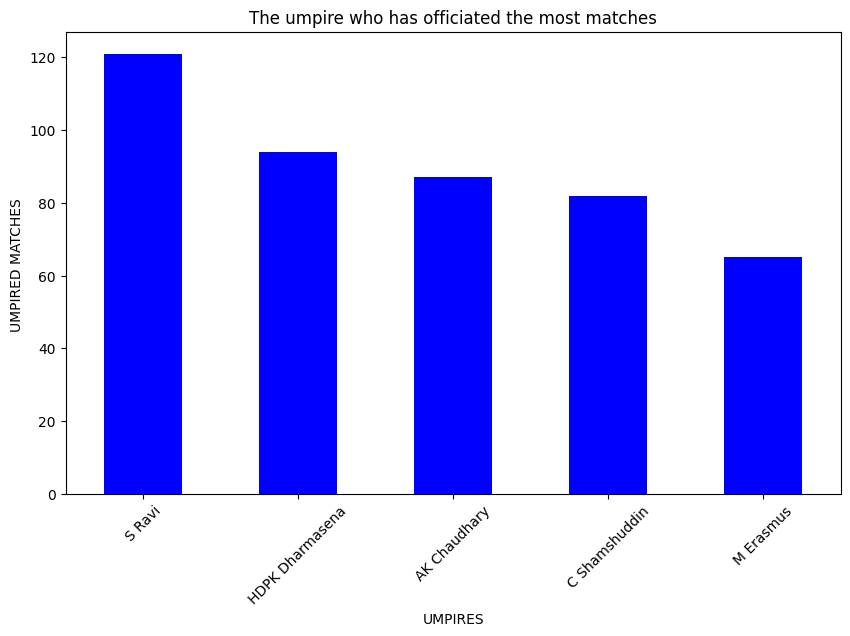

In [ ]:

# Combine 'umpire1' and 'umpire2' columns into a single column
umpires = pd.concat([df_ipl['umpire1'], df_ipl['umpire2']])

# Count the occurrences of each umpire
umpire_counts = umpires.value_counts()

# Get the umpire with the highest count
most_matches_umpire = umpire_counts.idxmax()

# Get the number of matches officiated by the umpire
matches_count = umpire_counts.max()

# Print the result
print(f"\n\nThe umpire who has officiated the most matches is {most_matches_umpire} with {matches_count} matches.\n")


# Plot the runs scored per match in different seasons
plt.figure(figsize=(10, 6))
umpire_counts.head(5).plot(kind='bar', color='blue')
plt.title('The umpire who has officiated the most matches')
plt.xlabel('UMPIRES')
plt.ylabel('UMPIRED MATCHES ')
plt.xticks(rotation=45)
plt.show()

## 5 ) which team has won the most toses ?

In [ ]:


# Count the occurrences of each team as the toss winner
toss_winner_counts = df_ipl['toss_winner'].value_counts()

# Get the team with the highest count
most_toss_wins_team = toss_winner_counts.idxmax()

# Get the number of toss wins by the team
toss_wins_count = toss_winner_counts.max()

# Print the result
print(f"The team that has won the most tosses is {most_toss_wins_team} with {toss_wins_count} toss wins.")




The team that has won the most tosses is Mumbai Indians with 106 toss wins.


# 6 ) HOW DOES THE TEAM DECIDE AFTER WINNING THE TOSS ?

After winning the toss in a cricket match, the team has the opportunity to make a decision based on their strategic preferences. The team captain makes a decision by choosing one of the following options:

1. Batting: If the team decides to bat first, they will send their opening batsmen to the field to face the opposition's bowling attack. The objective is to score as many runs as possible during their innings. This decision is often made if the team has confidence in their batting lineup or if the pitch conditions are expected to be favorable for batting.

2. Fielding/Bowling: If the team decides to field or bowl first, they allow the opposition team to bat first. The team's bowlers will then try to dismiss the opposition batsmen and restrict the opponent's scoring. This decision is often made if the team believes their bowlers can take early wickets or if the pitch conditions are expected to be helpful for the bowlers (e.g., if there is moisture on the pitch early on).

The decision of whether to bat or field/bowl after winning the toss depends on various factors, including the team's strengths, weaknesses, the conditions of the pitch and weather, the target score they want to set or chase, and the overall match strategy. It is an important strategic decision that can significantly impact the outcome of the match.

It's worth noting that the decision-making process can vary depending on the team's playing style, the format of the match (e.g., Test, ODI, T20), and other situational factors.

# 7) HOW DOES THR TOSS DECISION VARY ACROSS THE SEASON ?

toss_decision  bat  field
season                   
2008            26     32
2009            35     22
2010            39     21
2011            25     48
2012            37     37
2013            45     31
2014            19     41
2015            25     34
2016            11     49
2017            11     48
2018            10     50
2019            10     50
2020            27     33


<Figure size 1000x600 with 0 Axes>

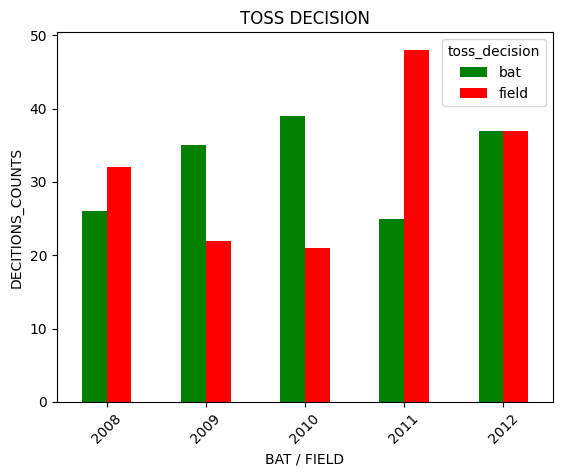

In [ ]:

# Group by season and toss decision, and count the occurrences
toss_decision_counts = df_ipl.groupby(['season', 'toss_decision']).size().reset_index(name='count')

# Pivot the table to make toss decisions as columns
toss_decision_table = toss_decision_counts.pivot(index='season', columns='toss_decision', values='count')

# Print the resulting table
print(toss_decision_table)


plt.figure(figsize=(10, 6))
toss_decision_table.head(5).plot(kind='bar', color= ['g','r'])
plt.title('TOSS DECISION')
plt.xlabel('BAT / FIELD')
plt.ylabel('DECITIONS_COUNTS')
plt.xticks(rotation=45)
plt.show()

# 8 )DOES THE WINNING THE TOSS IMPLY THE WINNING THE GAME ?

## Winning the toss in a cricket match does not guarantee winning the game. While winning the toss provides certain advantages, the outcome of the match is influenced by various factors such as team performance, player skills, match conditions, strategies, and a combination of individual and team efforts.

## Advantages of winning the toss:
1. Decision-making: The team winning the toss gets to decide whether to bat first or bowl/field first, allowing them to tailor their strategy based on pitch conditions, weather, and team strengths.
2. Pitch conditions: In some matches, pitch conditions may favor batting in the first innings or bowling in the second innings. Winning the toss provides an opportunity to take advantage of favorable conditions.
3. Psychological boost: Winning the toss can provide a psychological boost to the team, boosting morale and confidence.

However, winning the toss is just one factor among many that influence the outcome of a cricket match. The team still needs to execute their plans effectively, perform well in batting, bowling, and fielding, adapt to changing match situations, and make strategic decisions throughout the game.

Ultimately, the outcome of the match depends on the performance and abilities of both teams on the given day. Cricket is a highly unpredictable game, and even with the advantage of winning the toss, the result can go in favor of either team based on their skills and performance during the match.

# 9 ) HOW MANY TIN-MES HAS THE CHASING TEAM WON THE MATCH ?

In [ ]:

# Filter the data to include only matches where the toss-winning team chose to field/bowl
chasing_team_wins = df_ipl[df_ipl['team2'] == df_ipl['winner']]

# Count the occurrences of the chasing team winning the match
chasing_team_wins_count = len(chasing_team_wins)

# Print the result
print(f"The chasing team has won the match {chasing_team_wins_count} times.")


The chasing team has won the match 367 times.


# 10 ) WHICH ALL TEAMS HAD WON THIS TOURNAMENT ?

In [ ]:

# Get the unique winners of the IPL tournament
tournament_winners = df_ipl['winner'].unique()

# Print the result
print("Teams that have won the IPL tournament:")
for team in tournament_winners:
    print(team)


Teams that have won the IPL tournament:
Kolkata Knight Riders
Chennai Super Kings
Delhi Daredevils
Royal Challengers Bangalore
Rajasthan Royals
Kings XI Punjab
Deccan Chargers
Mumbai Indians
Pune Warriors
Kochi Tuskers Kerala
nan
Sunrisers Hyderabad
Rising Pune Supergiants
Gujarat Lions
Rising Pune Supergiant
Delhi Capitals


# 11 ) WHICH TEAM HAS PLAYED THE MOST NUMBER OF MATCHES ?

In [ ]:


# Concatenate 'team1' and 'team2' columns into a single column
teams = pd.concat([df_ipl['team1'], df_ipl['team2']])

# Count the occurrences of each team
team_counts = teams.value_counts()

# Get the teams that have played the most matches
most_matches_teams = team_counts.index[:5]  # Change 5 to the desired number of teams

# Print the result
print("Teams that have played the most number of matches:")
for team in most_matches_teams:
    print(team)


Teams that have played the most number of matches:
Mumbai Indians
Royal Challengers Bangalore
Kolkata Knight Riders
Kings XI Punjab
Chennai Super Kings


# 12)  WHICH TEAM HAS THE HIGHEST WINNING PERCENTAGE ?





In [ ]:


# Calculate the total matches played by each team
matches_played = df_ipl['team1'].value_counts() + df_ipl['team2'].value_counts()

# Calculate the total matches won by each team
matches_won = df_ipl['winner'].value_counts()

# Calculate the winning percentage for each team
winning_percentage = (matches_won / matches_played) * 100

# Get the team with the highest winning percentage
team_highest_win_percentage = winning_percentage.idxmax()

# Get the highest winning percentage
highest_win_percentage = winning_percentage.max()

# Print the result
print(f"The team with the highest winning percentage is {team_highest_win_percentage} with a winning percentage of {highest_win_percentage:.2f}%.")


The team with the highest winning percentage is Rising Pune Supergiant with a winning percentage of 62.50%.


# 13 ) IS THERE IS ANY LUCY VENUE FOR A PARTICULAR TEAM ?

In [ ]:

# Specify the team for analysis
team = 'Mumbai Indians'

# Filter the data frame to include matches won by the specified team
team_matches_won = df_ipl[df_ipl['winner'] == team]

# Count the occurrences of each venue where the team has won
venue_counts = team_matches_won['venue'].value_counts()

# Get the venue(s) with the most wins for the team
lucky_venues = venue_counts[venue_counts == venue_counts.max()].index

# Print the result
print(f"The lucky venue(s) for {team} is/are:")
for venue in lucky_venues:
    print(venue)


The lucky venue(s) for Mumbai Indians is/are:
Wankhede Stadium


# 14 ) WHICH TEAM HAS SCORED THE MOST NUMBER OF 200 + SCORES ?

Teams with the most number of 200+ scores:
Royal Challengers Bangalore    19
Chennai Super Kings            17
Kings XI Punjab                14
Mumbai Indians                 14
Kolkata Knight Riders          12
Sunrisers Hyderabad            12
Rajasthan Royals                9
Delhi Daredevils                5
Delhi Capitals                  2
Deccan Chargers                 1
Gujarat Lions                   1
Name: batting_team, dtype: int64


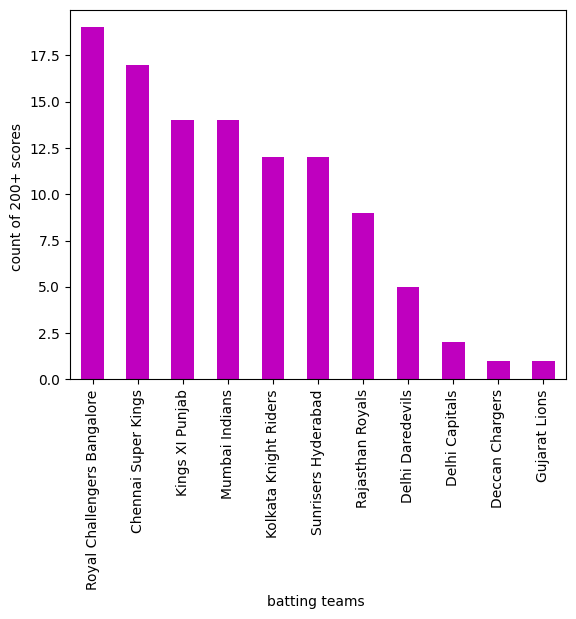

In [ ]:

# Filter the data to include only innings where the total score is 200 or more
df_200_plus_scores = df_ball.groupby(['id', 'inning','batting_team'])['total_runs'].sum().reset_index()
df_200_plus_scores = df_200_plus_scores[df_200_plus_scores['total_runs'] >= 200]

# Count the occurrences of 200+ scores for each team
team_200_plus_scores = df_200_plus_scores['batting_team'].value_counts()

# Print the teams with the most number of 200+ scores
print("Teams with the most number of 200+ scores:")
print(team_200_plus_scores)


team_200_plus_scores.plot(kind = 'bar', color = 'm')
plt.xlabel("batting teams ")
plt.ylabel("count of 200+ scores ")
plt.show()

# 15 ) WHAT WAS THE HIGHEST RUN SCORED BY THE TEAM IN A SINGLE MATCH  ?

In [ ]:

# Find the highest run scored by a team in a single match
highest_run = df_ball['total_runs'].max()

# Print the result
print("Highest run scored by a team in a single match:", highest_run)


Highest run scored by a team in a single match: 7


# 16 ) WHICH IS THE BIGGEST WIN IN TEARMS OF RUN MARGIN ?

In [ ]:

# Find the biggest win in terms of run margin
biggest_win = df_ipl['result_margin'].max()

# Print the result
print("Biggest win in terms of run margin:", biggest_win)


Biggest win in terms of run margin: 146.0


# 17 ) WHICH BATS MAN HAVE PLAYED THE MOST NUMBER OF BALLS ?

In [ ]:

# Group by batsman and calculate the count of balls faced
balls_faced = df_ball['batsman'].value_counts()

# Get the batsman who has played the most number of balls
most_balls_faced = balls_faced.idxmax()

# Get the count of balls faced by the batsman
balls_played = balls_faced.max()

# Print the result
print("Batsman who has played the most number of balls:", most_balls_faced)
print("Number of balls played:", balls_played)


Batsman who has played the most number of balls: V Kohli
Number of balls played: 4609


# 18 ) WHO ARE THE LEADING RUN SCORES OF ALL TIME ?


Leading run scorers of all time:
            batsman  batsman_runs
505         V Kohli          5878
438        SK Raina          5368
116       DA Warner          5254
379       RG Sharma          5230
407        S Dhawan          5197
..              ...           ...
178       IC Pandey             0
411       S Kaushik             0
321        ND Doshi             0
506  V Pratap Singh             0
58     Abdur Razzak             0

[537 rows x 2 columns]


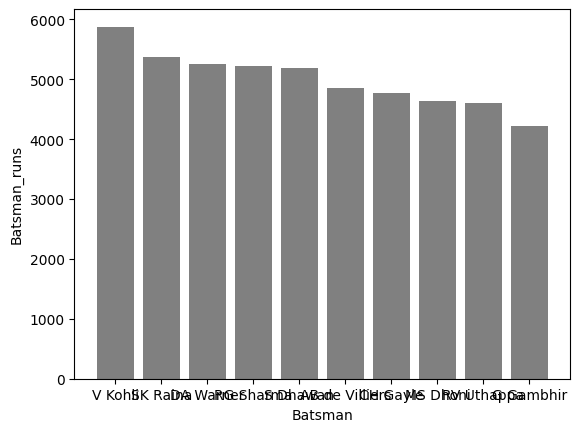

In [ ]:

# Group by batsman and calculate the sum of runs scored
runs_scored = df_ball.groupby('batsman')['batsman_runs'].sum().reset_index()

# Sort the data frame by runs scored in descending order
runs_scored = runs_scored.sort_values(by='batsman_runs', ascending=False)

# Print the leading run scorers
print("Leading run scorers of all time:")
print(runs_scored)


plt.bar(runs_scored['batsman'].head(10), runs_scored['batsman_runs'].head(10), color = 'gray')
plt.xlabel("Batsman")
plt.ylabel("Batsman_runs")
plt.show()

# 19 ) WHO HAS HIT THE MOST NUMBER OF 4'S ?

Player who has hit the most number of fours: S Dhawan
Number of fours hit: 591


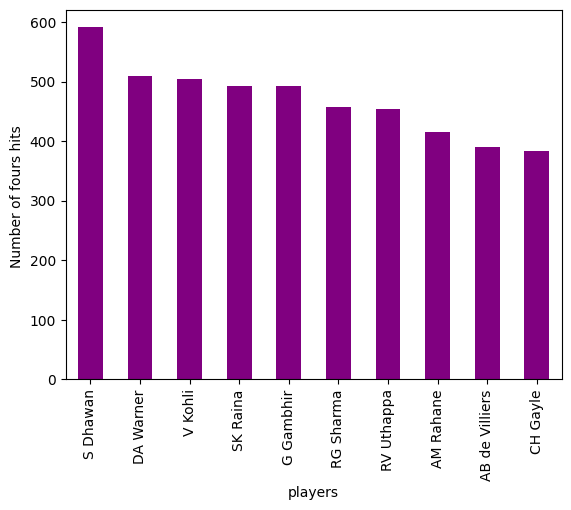

In [ ]:


# Filter the data to include only fours
fours = df_ball[df_ball['batsman_runs'] == 4]

# Group by batsman and calculate the count of fours
fours_count = fours['batsman'].value_counts()

# Get the player who has hit the most number of fours
most_fours_player = fours_count.idxmax()

# Get the count of fours hit by the player
fours_hit = fours_count.max()

# Print the result
print("Player who has hit the most number of fours:", most_fours_player)
print("Number of fours hit:", fours_hit)


fours_count.head(10).plot(kind = 'bar', color = 'purple')
plt.xlabel("players")
plt.ylabel("Number of fours hits ")
plt.show()

# 20 ) WHO HAS HIT THE MOST NUMBER OF 6'S ?

Player who has hit the most number of sixes: CH Gayle
Number of sixes hit: 349


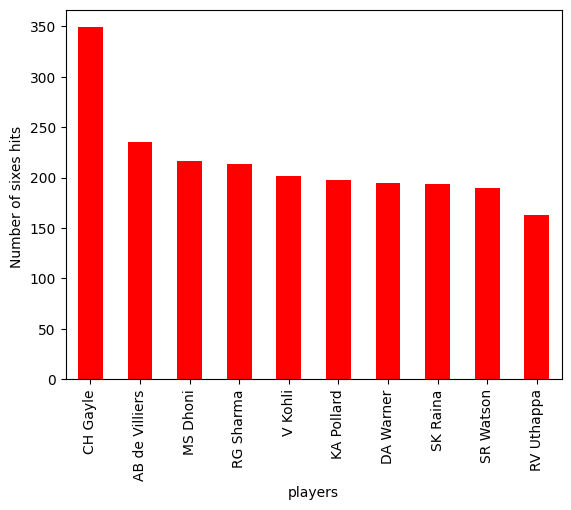

In [ ]:

# Filter the data to include only sixes
sixes = df_ball[df_ball['batsman_runs'] == 6]

# Group by batsman and calculate the count of sixes
sixes_count = sixes['batsman'].value_counts()

# Get the player who has hit the most number of sixes
most_sixes_player = sixes_count.idxmax()

# Get the count of sixes hit by the player
sixes_hit = sixes_count.max()

# Print the result
print("Player who has hit the most number of sixes:", most_sixes_player)
print("Number of sixes hit:", sixes_hit)


sixes_count.head(10).plot(kind = 'bar', color = 'r')
plt.xlabel("players")
plt.ylabel("Number of sixes hits ")
plt.show()

# 21 ) WHO HAS THE HIGHEST STRIKE RATE ?

In [ ]:


# Group by batsman and calculate the total runs and balls faced
player_stats = df_ball.groupby('batsman').agg({'batsman_runs': 'sum', 'ball': 'count'}).reset_index()

# Calculate the strike rate for each player
player_stats['strike_rate'] = (player_stats['batsman_runs'] / player_stats['ball']) * 100

# Sort the data frame by strike rate in descending order
player_stats = player_stats.sort_values(by='strike_rate', ascending=False)

# Get the player with the highest strike rate
highest_strike_rate_player = player_stats.iloc[0]['batsman']
highest_strike_rate = player_stats.iloc[0]['strike_rate']

# Print the result
print("Player with the highest strike rate:", highest_strike_rate_player)
print("Highest strike rate:", highest_strike_rate)


Player with the highest strike rate: B Stanlake
Highest strike rate: 250.0


# 22 ) WHO IS THE LEADING WICKET TAKER ?

Leading wicket-taker in the IPL: SL Malinga
Number of wickets taken: 188


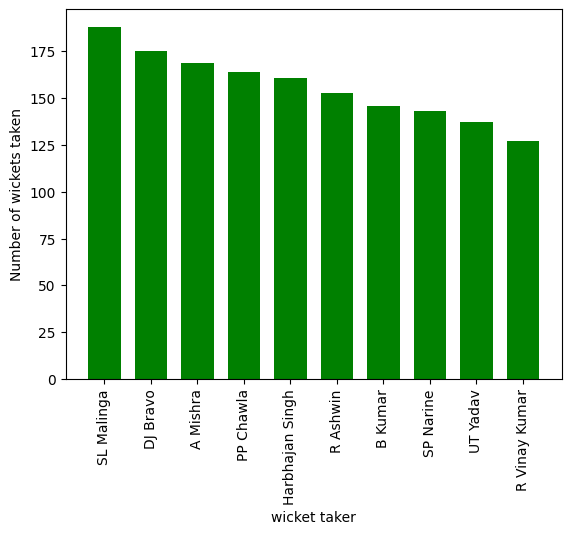

In [ ]:


# Group by bowler and calculate the count of wickets
wickets_taken = df_ball.groupby('bowler')['is_wicket'].sum().reset_index()

# Sort the data frame by wickets taken in descending order
wickets_taken = wickets_taken.sort_values(by='is_wicket', ascending=False)

# Get the leading wicket-taker
leading_wicket_taker = wickets_taken.iloc[0]['bowler']
wickets_count = wickets_taken.iloc[0]['is_wicket']

# Print the result
print("Leading wicket-taker in the IPL:", leading_wicket_taker)
print("Number of wickets taken:", wickets_count)


plt.bar(wickets_taken['bowler'].head(10), wickets_taken['is_wicket'].head(10), color = 'g', width = 0.7)
plt.xlabel("wicket taker")
plt.ylabel("Number of wickets taken")
plt.xticks(rotation = 90)
plt.show()

# 23 ) WHICH STADIUM HAS HOSTED THE MOST NUMBER OF MATCHES ?

Stadium that has hosted the most number of matches: Eden Gardens
Number of matches hosted: 77


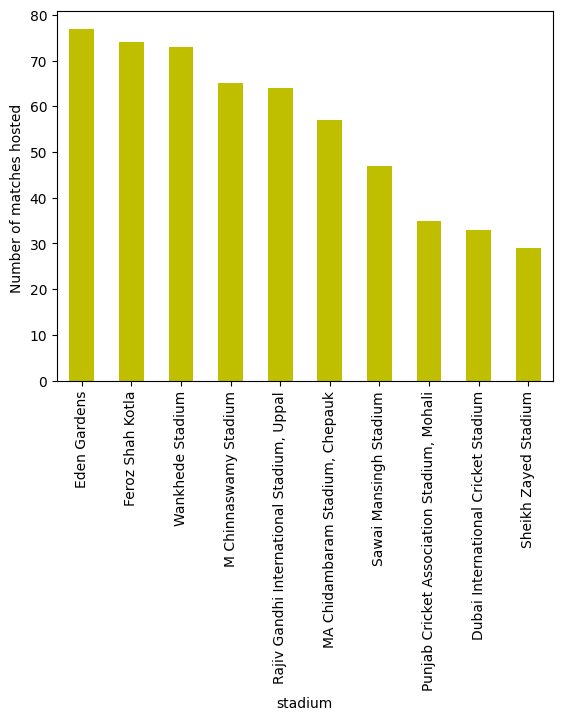

In [ ]:

# Count the occurrences of matches at each stadium
matches_per_stadium = df_ipl['venue'].value_counts()

# Get the stadium that has hosted the most number of matches
most_matches_stadium = matches_per_stadium.idxmax()

# Get the count of matches hosted at the stadium
matches_count = matches_per_stadium.max()

# Print the result
print("Stadium that has hosted the most number of matches:", most_matches_stadium)
print("Number of matches hosted:", matches_count)

matches_per_stadium.head(10).plot(kind = 'bar', color = 'y')
plt.xlabel("stadium")
plt.ylabel("Number of matches hosted ")
plt.show()

# 24 ) WHO HAS THE MOST MOM AWARDS ?

Player who has won the most Man of the Match awards: AB de Villiers
Number of Man of the Match awards won: 23


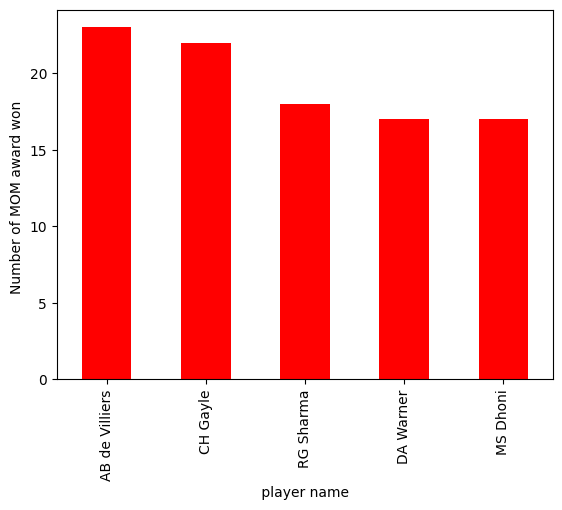

In [ ]:

# Count the occurrences of MOM awards for each player
mom_awards = df_ipl['player_of_match'].value_counts()

# Get the player who has won the most MOM awards
most_mom_player = mom_awards.idxmax()

# Get the count of MOM awards won by the player
mom_awards_count = mom_awards.max()

# Print the result
print("Player who has won the most Man of the Match awards:", most_mom_player)
print("Number of Man of the Match awards won:", mom_awards_count)

mom_awards.head().plot(kind='bar', color = 'r')
plt.xlabel(" player name ")
plt.ylabel("Number of MOM award won ")
plt.show()

# 24 ) WHAT IS THE COUNT OF FOURS IN EACH SEASON ?

Count of fours hit in each season:
2008    1703
2009    1317
2010    1708
2011    1916
2012    1911
2013    2052
2014    1562
2015    1607
2016    1633
2017    1611
2018    1652
2019    1653
2020    1583
Name: season, dtype: int64


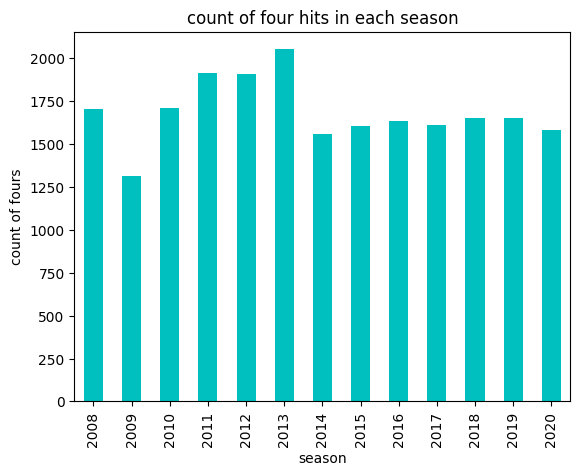

In [ ]:

# Merge the ball-by-ball data frame and IPL match data frame on the 'id' column
df_merged = pd.merge(df_ball, df_ipl[['id', 'season']], on='id')

# Filter the data to include only fours
fours = df_merged[df_merged['batsman_runs'] == 4]

# Group by season and calculate the count of fours
fours_count_per_season = fours['season'].value_counts().sort_index()

# Print the result
print("Count of fours hit in each season:")
print(fours_count_per_season)

fours_count_per_season.plot(kind = 'bar', color = 'c')
plt.xlabel('season')
plt.ylabel("count of fours")
plt.title("count of four hits in each season")
plt.show()


# 26 ) WHAT IS THE COUNT OF SIXES HIT IN THE EACH SEASON ? WHAT IS THE COUNT OF RUNS SCORED FROM BOUNDARIES IN EACH SEASON ?

In [ ]:

# Merge the ball-by-ball data frame and IPL match data frame on the 'id' column
df_merged = pd.merge(df_ball, df_ipl[['id', 'season']], on='id')

# Filter the data to include only sixes
sixes = df_merged[df_merged['batsman_runs'] == 6]

# Group by season and calculate the count of sixes
sixes_count_per_season = sixes['season'].value_counts().sort_index()

# Filter the data to include only boundaries (fours and sixes)
boundaries = df_merged[df_merged['batsman_runs'].isin([4, 6])]

# Group by season and calculate the sum of runs from boundaries
runs_from_boundaries_per_season = boundaries.groupby('season')['batsman_runs'].sum().sort_index()

# Print the result
print("Count of sixes hit in each season:")
print(sixes_count_per_season)

print("\nCount of runs scored from boundaries in each season:")
print(runs_from_boundaries_per_season)


Count of sixes hit in each season:
2008    623
2009    506
2010    585
2011    639
2012    733
2013    675
2014    714
2015    692
2016    639
2017    705
2018    872
2019    784
2020    735
Name: season, dtype: int64

Count of runs scored from boundaries in each season:
season
2008    10550
2009     8304
2010    10342
2011    11498
2012    12042
2013    12258
2014    10532
2015    10580
2016    10366
2017    10674
2018    11840
2019    11316
2020    10742
Name: batsman_runs, dtype: int64


# 27 ) WHICH TEAM HAS SCORED THE MOST RUNS IN THE FIRST 6 OVERS ?

In [ ]:

# Filter the data to include only the last four overs
last_four_overs = df_ball[df_ball['over'] > 14]

# Group by batting team and calculate the total runs
team_runs_last_four_overs = last_four_overs.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

# Get the team with the most runs
team_with_most_runs = team_runs_last_four_overs.index[0]

# Print the result
print("Team with the most runs in the last four overs:")
print(team_with_most_runs)


Team with the most runs in the last four overs:
Mumbai Indians


# 28 ) WHICH TEAM HAS THE MOST RUNS IN THE LAST LAST FOUR OVERS ?



In [ ]:

# Filter the data to include only the last four overs
last_four_overs = df_ball[df_ball['over'] > 16]

# Group by batting team and calculate the total runs
team_runs_last_four_overs = last_four_overs.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

# Get the team with the most runs
team_with_most_runs = team_runs_last_four_overs.index[0]

# Print the result
print("Team with the most runs in the last four overs:")
print(team_with_most_runs)


Team with the most runs in the last four overs:
Mumbai Indians


# 29 ) WHICH TEAM HAS THE BEST SCORING RUN_RATE IN THE FIRST 6 OVERS ?

In [ ]:


# Filter the data to include only the first six overs
first_six_overs = df_ball[df_ball['over'] <= 6]

# Group by batting team and calculate the total runs and total balls faced
team_runs_balls = first_six_overs.groupby('batting_team')['batsman_runs'].agg(['sum', 'count'])

# Calculate the run rate for each team
team_run_rate = (team_runs_balls['sum'] / team_runs_balls['count']) * 6

# Get the team with the highest run rate
team_with_best_run_rate = team_run_rate.idxmax()

# Print the result
print("Team with the best scoring run rate in the first six overs:")
print(team_with_best_run_rate)


Team with the best scoring run rate in the first six overs:
Gujarat Lions


# 30 ) WHICH TEAM HAS THE BEST SCORING RUN_RATE IN THE FIRST 4 OVERS ?

In [ ]:


# Filter the data to include only the first four overs
first_four_overs = df_ball[df_ball['over'] <= 4]

# Group by batting team and calculate the total runs and total balls faced
team_runs_balls = first_four_overs.groupby('batting_team')['batsman_runs'].agg(['sum', 'count'])

# Calculate the run rate for each team
team_run_rate = (team_runs_balls['sum'] / team_runs_balls['count']) * 6

# Get the team with the highest run rate
team_with_best_run_rate = team_run_rate.idxmax()

# Print the result
print("Team with the best scoring run rate in the first four overs:")
print(team_with_best_run_rate)


Team with the best scoring run rate in the first four overs:
Gujarat Lions
